# Feynn Labs Internship
### **Project-2 - EV Market Segmentation**

> By Kavuluru Lakshmi Srinidhi


###Importing Libraries

In [129]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

from scipy.stats import entropy
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

###Importing Datasets

In [130]:
dataset1=pd.read_xml("dataset-EVcategories.xml")
dataset1

,SL._NO.,CATEGORY,_2022,_2023,_percent_GROWTH
0,1,2 Wheelers,631464,859376,36.09
1,2,3 Wheelers,352710,582793,65.23
2,3,Commercial Vehicles,2649,5673,114.16
3,4,Passenger Vehicles,38240,82105,114.71


In [131]:
dataset2=pd.read_xml("dataset_EV_typeNstate.xml")
dataset2.head()

,STATE_NAME,TWO_WHEELER,THREE_WHEELER,FOUR_WHEELER,GOODS_VEHICLES,PUBLIC_SERVICE_VEHICLE,SPECIAL_CATEGORY_VEHICLES,AMBULANCEHEARSES,CONSTRUCTION_EQUIPMENT_VEHICLE,OTHER,GRAND_TOTAL
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [132]:
dataset3=pd.read_csv("ElectricCarData_Norm.csv")
dataset3.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


###Exploratory Data Analysis (EDA)

###*On Dataset1*

In [133]:
dataset1['Total'] = dataset1[['_2022', '_2023']].sum(axis=1)
dataset1

,SL._NO.,CATEGORY,_2022,_2023,_percent_GROWTH,Total
0,1,2 Wheelers,631464,859376,36.09,1490840
1,2,3 Wheelers,352710,582793,65.23,935503
2,3,Commercial Vehicles,2649,5673,114.16,8322
3,4,Passenger Vehicles,38240,82105,114.71,120345


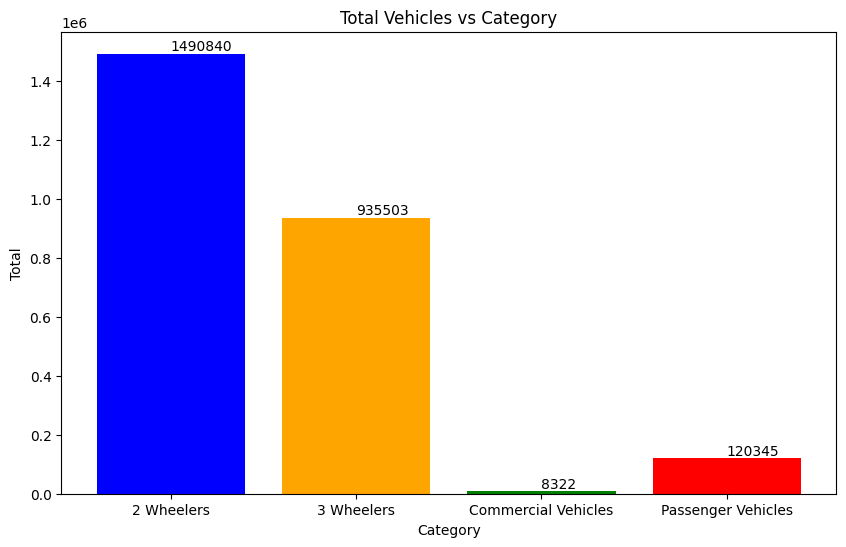

In [134]:
categories = ['2 Wheelers', '3 Wheelers', 'Commercial Vehicles', 'Passenger Vehicles']

# Plotting
plt.figure(figsize=(10, 6))
bars=plt.bar(categories, dataset1['Total'], color=['blue', 'orange', 'green', 'red'])

# Adding titles and labels
plt.title('Total Vehicles vs Category')
plt.xlabel('Category')
plt.ylabel('Total')

# Adding the precise total values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', va='bottom')  # va: vertical alignment


# Show plot
plt.show()


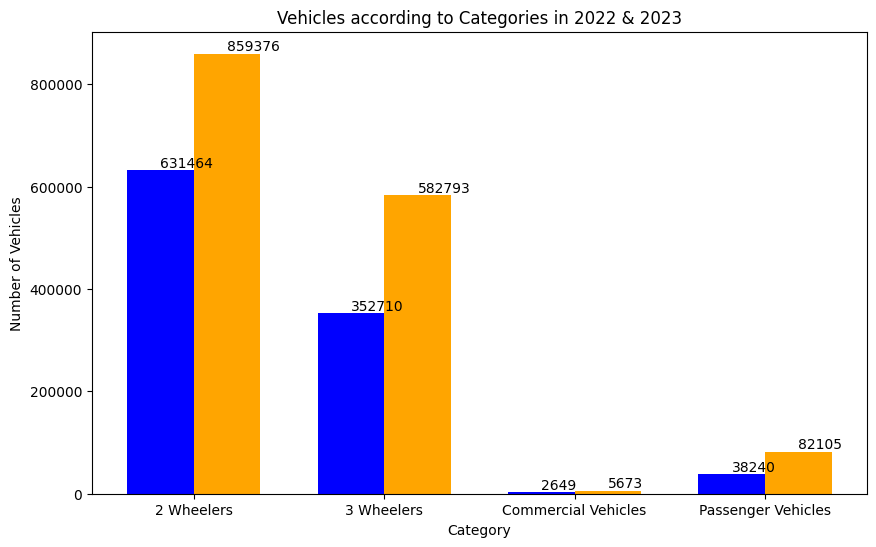

In [135]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

# Bars for 2022
bars1 = ax.bar(index, dataset1['_2022'], bar_width, label='2022', color='blue')

# Bars for 2023
bars2 = ax.bar([i + bar_width for i in index], dataset1['_2023'], bar_width, label='2023', color='orange')

# Adding titles and labels
ax.set_title('Vehicles according to Categories in 2022 & 2023')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Vehicles')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)

# Adding the precise values on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', va='bottom')  # va: vertical alignment

# Show plot
plt.show()

###*On Dataset2*

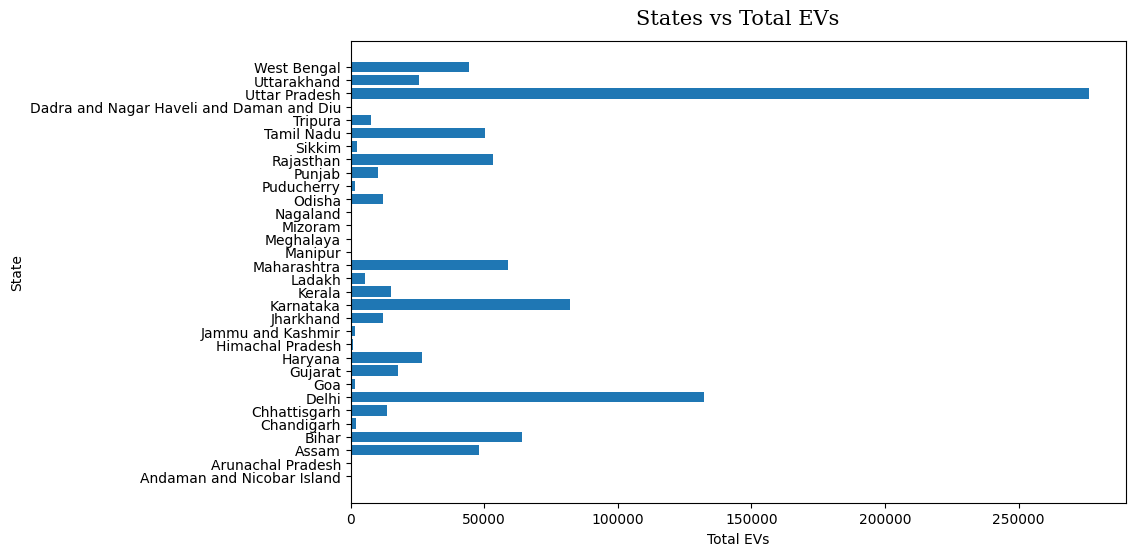

In [136]:
# Plotting
plt.figure(figsize=(10, 6))
bars=plt.barh(dataset2['STATE_NAME'],dataset2['GRAND_TOTAL'])
# Adding titles and labels
plt.title('States vs Total EVs', weight=200, family='serif', size=15, pad=12)
plt.xlabel('Total EVs')
plt.ylabel('State')

# Show plot
plt.show()


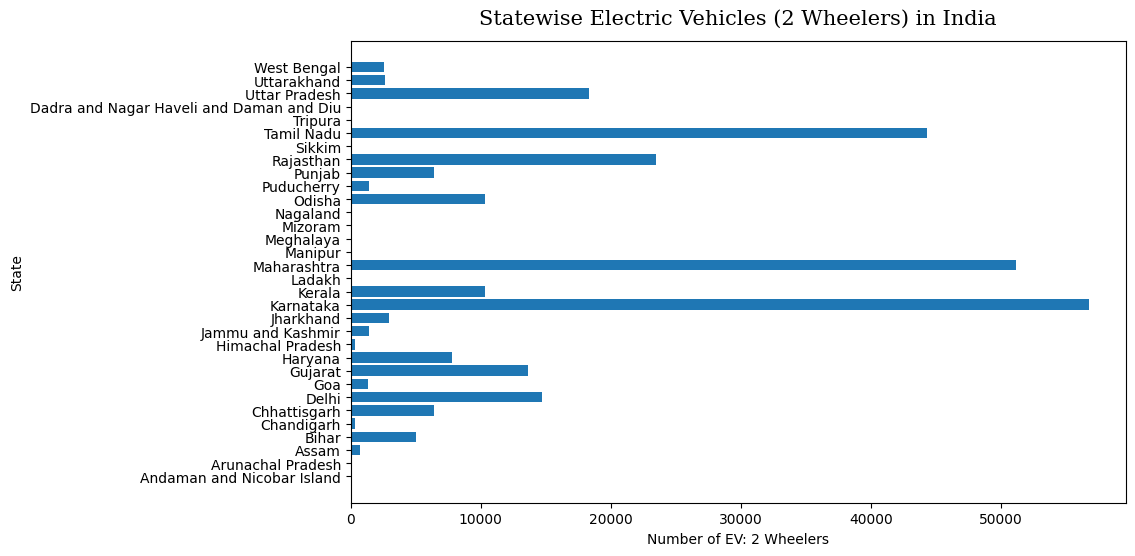

In [137]:
plt.figure(figsize=(10, 6))
plt.barh(dataset2['STATE_NAME'],dataset2['TWO_WHEELER'])

plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.ylabel('State')
plt.xlabel('Number of EV: 2 Wheelers')

plt.show()

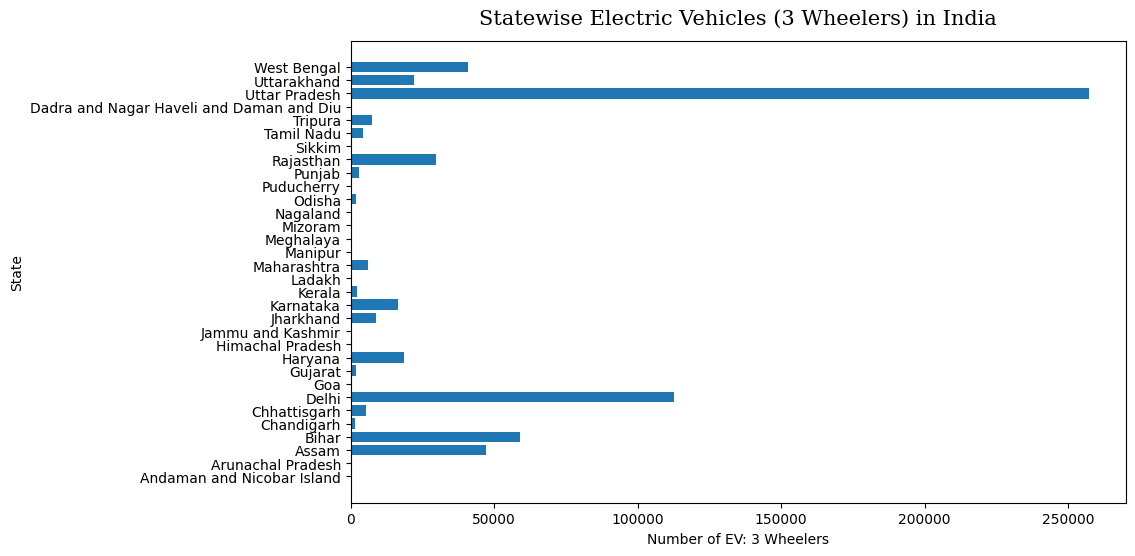

In [138]:
plt.figure(figsize=(10, 6))
plt.barh(dataset2['STATE_NAME'],dataset2['THREE_WHEELER'])

plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.ylabel('State')
plt.xlabel('Number of EV: 3 Wheelers')

plt.show()

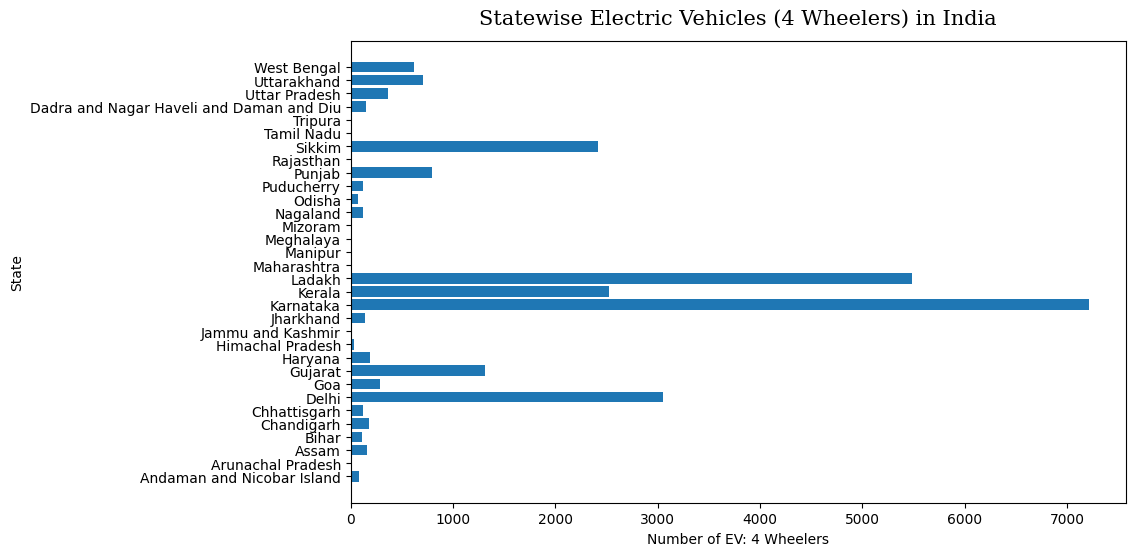

In [139]:
plt.figure(figsize=(10, 6))
plt.barh(dataset2['STATE_NAME'],dataset2['FOUR_WHEELER'])

plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.ylabel('State')
plt.xlabel('Number of EV: 4 Wheelers')

plt.show()

###*On Dataset3*

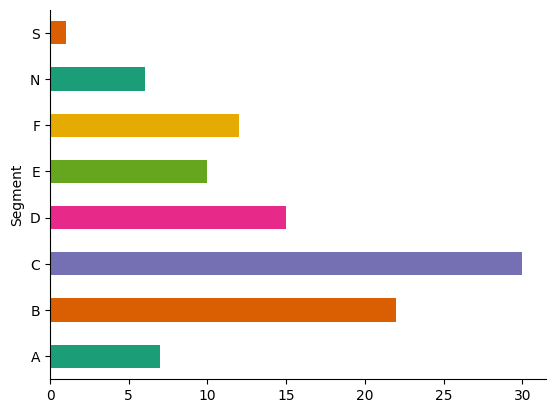

In [140]:
dataset3.groupby('Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

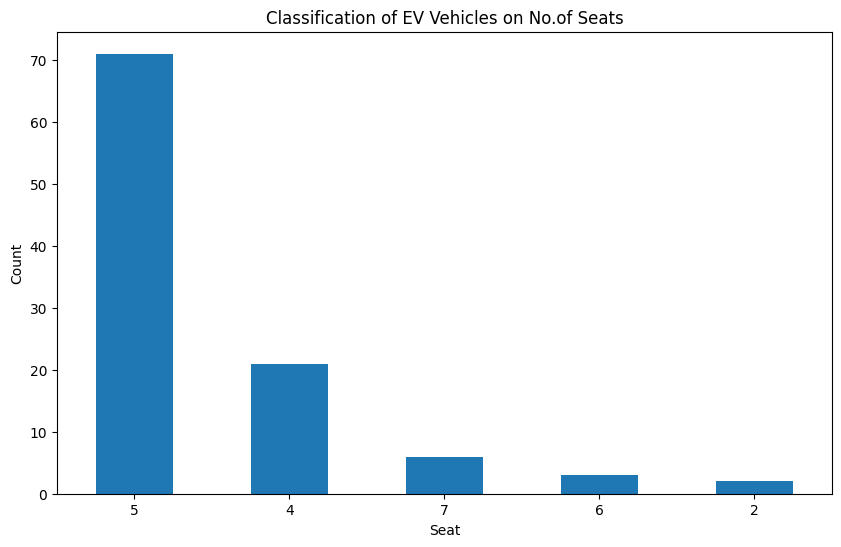

In [141]:
# Group by 'Seat' and count the occurrences
seat_counts = dataset3['Seats'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
seat_counts.plot(kind='bar')
plt.title('Classification of EV Vehicles on No.of Seats')
plt.xlabel('Seat')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

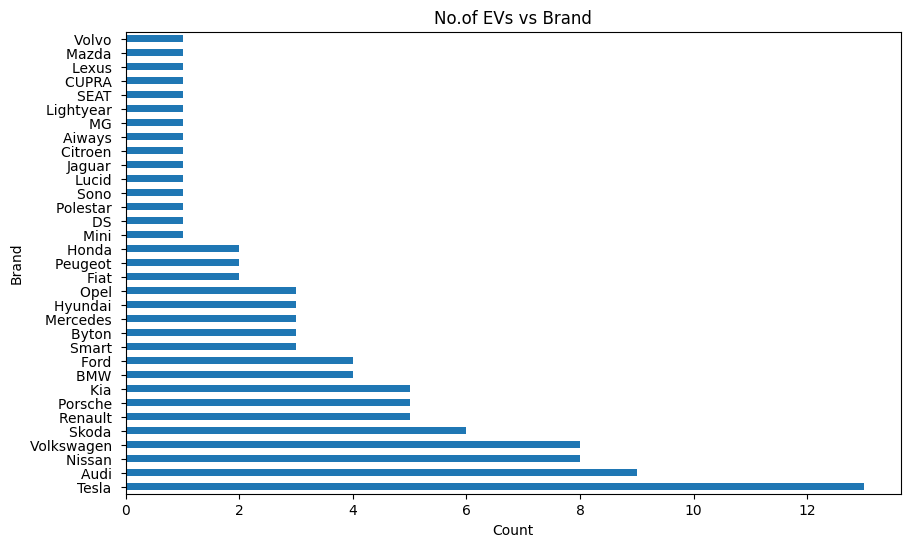

In [142]:
# Group by 'Brand' and count the occurrences
brand_counts = dataset3['Brand'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh')
plt.title('No.of EVs vs Brand')
plt.ylabel('Brand')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

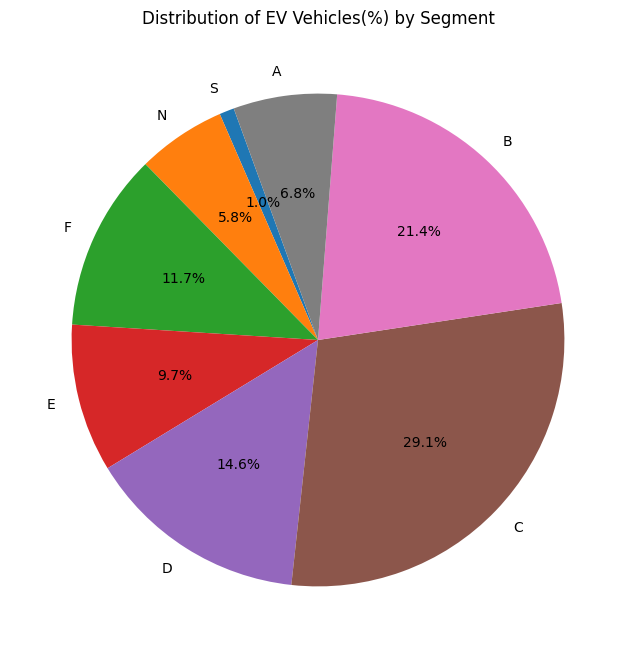

In [143]:
# Group by 'Segment' and count the occurrences
segment_counts = dataset3['Segment'].value_counts()
# print(segment_counts)
segment_counts.sort_index(inplace=True, ascending=False)
# print(segment_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=110)
plt.title('Distribution of EV Vehicles(%) by Segment')
plt.ylabel('')
plt.show()

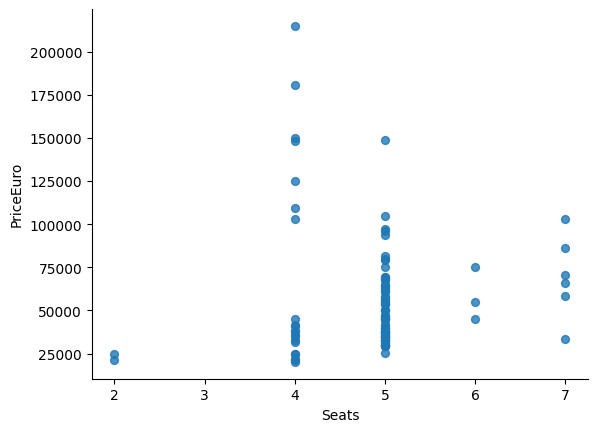

In [144]:
dataset3.plot(kind='scatter', x='Seats', y='PriceEuro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

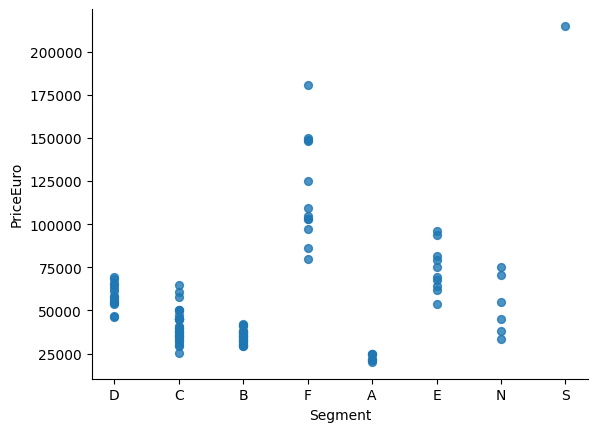

In [145]:
dataset3.plot(kind='scatter', x='Segment', y='PriceEuro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

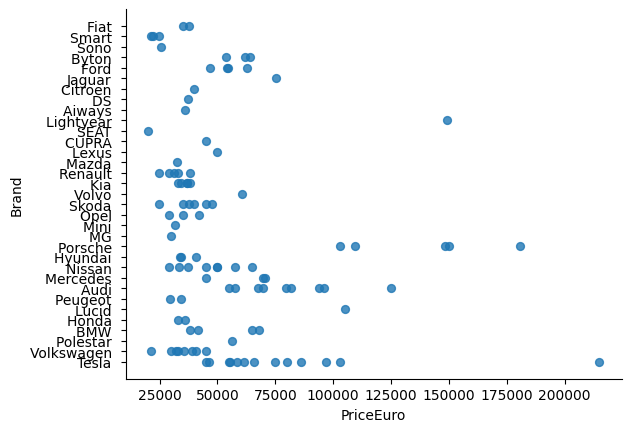

In [146]:
dataset3.plot(kind='scatter', y='Brand', x='PriceEuro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

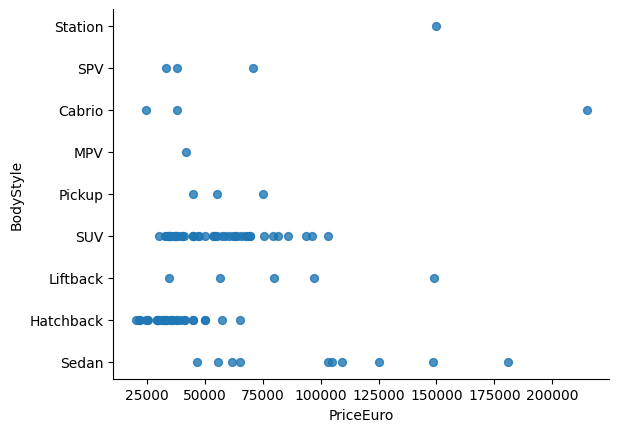

In [147]:
dataset3.plot(kind='scatter', y='BodyStyle', x='PriceEuro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

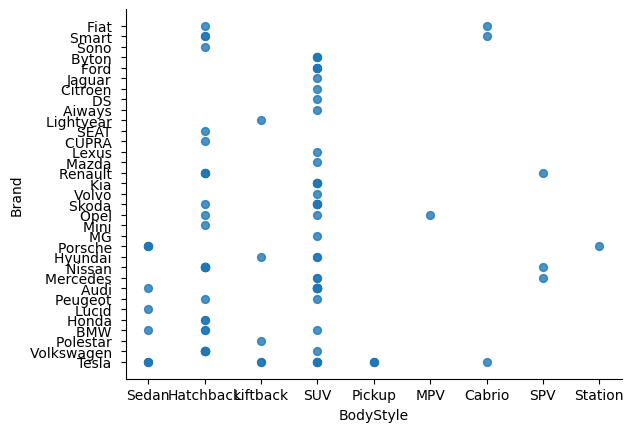

In [148]:
dataset3.plot(kind='scatter', y='Brand', x='BodyStyle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Data Preprocessing

In [149]:
pd.options.mode.chained_assignment = None  # default='warn'

dataset3
dataset3['Accel'].unique()
# since all are secs,lets convert to float val
for i in range(len(dataset3['Accel'])):
  dataset3['Accel'][i]=float(dataset3['Accel'][i][:-4])

dataset3['FastCharge'].replace('-', '0 km/h', inplace=True)
remove_units_intDtype= {
    'TopSpeed': -5,
    'Range': -3,
    'Efficiency': -6,
    'FastCharge':	-5
}

for col, unit in remove_units_intDtype.items():
    dataset3[col] = dataset3[col].apply(lambda x: int(x[:unit]))

dataset3.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


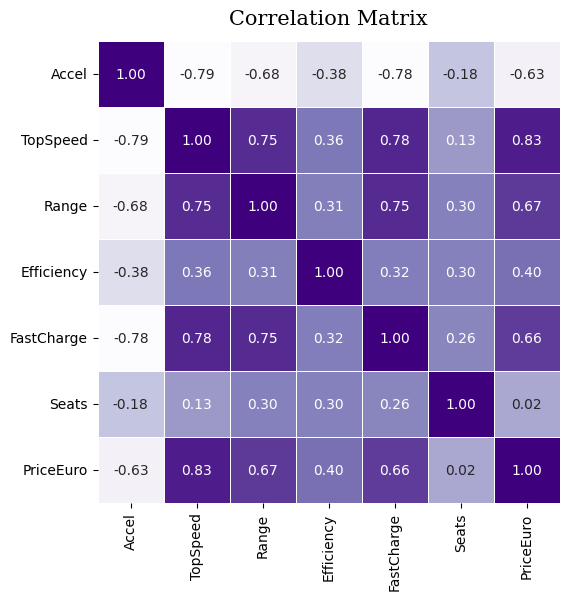

In [150]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dataset3[['Accel', 'TopSpeed','Range','Efficiency','FastCharge','Seats',	'PriceEuro']].corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

In [151]:
categories=['BodyStyle', 'Segment']
for i in categories:
  dataset3[i]=LabelEncoder().fit_transform(dataset3[i])

dataset3

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,7,3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,1,2,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,2,3,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,6,3,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,1,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Rapid charging possible,Front Wheel Drive,Type 2 CCS,1,2,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Rapid charging possible,All Wheel Drive,Type 2 CCS,6,4,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Rapid charging possible,All Wheel Drive,Type 2 CCS,1,2,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Rapid charging possible,All Wheel Drive,Type 2 CCS,1,2,5,65000


In [152]:
X_1 = dataset3[['Accel', 'TopSpeed', 'Range', 'Efficiency','FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType','BodyStyle',	'Segment', 'Seats', 'PriceEuro']]
X_1 = pd.get_dummies(X_1, columns = ['RapidCharge', 'PowerTrain', 'PlugType'])

scaler = StandardScaler()
x_1 = scaler.fit_transform(X_1)
x=x_1

In [153]:
x_1[0]

array([-0.93118617,  1.24088078,  0.88686204, -0.95724726,  2.31224775,
        1.16745618,  0.22402697,  0.1471092 , -0.00976088, -0.22587698,
        0.22587698,  1.22971343, -0.74873631, -0.56613852, -0.09901475,
       -0.30942637,  0.38005848, -0.17320508])

In [154]:
# Perform PCA
pca = PCA(n_components=8)
MD_pca = pca.fit_transform(x)

# Print a summary of the PCA results
explained_variance = pca.explained_variance_ratio_
standard_deviation = np.sqrt(pca.explained_variance_)
cumulative_variance = np.cumsum(explained_variance)

principal_components = [f'PC{i+1}' for i in range(len(explained_variance))]

# Creating a DataFrame to display the results more clearly
summary_df = pd.DataFrame({
    'Principal Component': principal_components,
    'Standard Deviation': standard_deviation,
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print(summary_df.to_string(index=False))

Principal Component  Standard Deviation  Explained Variance  Cumulative Variance
                PC1            2.585712            0.367833             0.367833
                PC2            1.790393            0.176355             0.544188
                PC3            1.387290            0.105883             0.650070
                PC4            1.155208            0.073419             0.723490
                PC5            1.041711            0.059701             0.783191
                PC6            0.943751            0.049001             0.832192
                PC7            0.844483            0.039235             0.871427
                PC8            0.808483            0.035961             0.907388


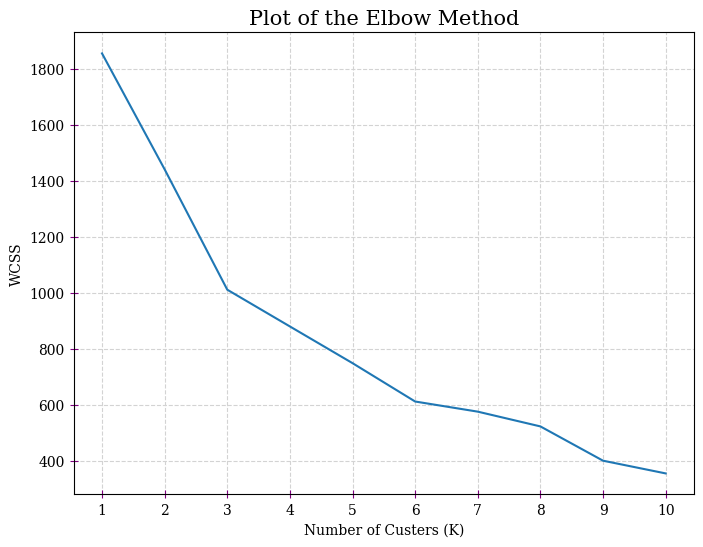

In [155]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, n_init='auto', random_state=90)
  kmean.fit(x_1)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

The Elbow Method indicates optimum Number of Cluster as 3

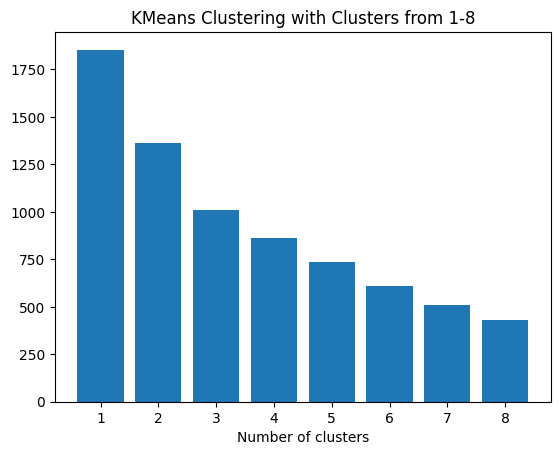

In [156]:
np.random.seed(1234)
def run_kmeans(data, cluster_no_min, cluster_no_max, nrep):
    dis = []
    MD_kmeans28 = {}
    for clusters_no in range(cluster_no_min, cluster_no_max):
      kmeans = KMeans(n_clusters=clusters_no, n_init=nrep, random_state=1234)
      kmeans.fit(data)
      dis.append((kmeans.inertia_))
      MD_kmeans28[str(clusters_no)] = kmeans
      if (clusters_no == 4):
        labels_k4=kmeans.labels_
    return dis,MD_kmeans28, labels_k4

# Run KMeans clustering for clusters 1 to 8 with 10 repetitions each
nrep = 10
dis,MD_kmeans28,labels_k4 = run_kmeans(x, 1, 9, nrep)

# Visualize the results
plt.bar(range(1,9), dis)
plt.title('KMeans Clustering with Clusters from 1-8')
plt.xlabel("Number of clusters")
plt.show()

###K-Means Clustering for Number of Clusters=3

In [157]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(MD_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=90)

In [158]:
pd.Series(kmean.labels_).value_counts()

1    50
2    48
0     5
Name: count, dtype: int64

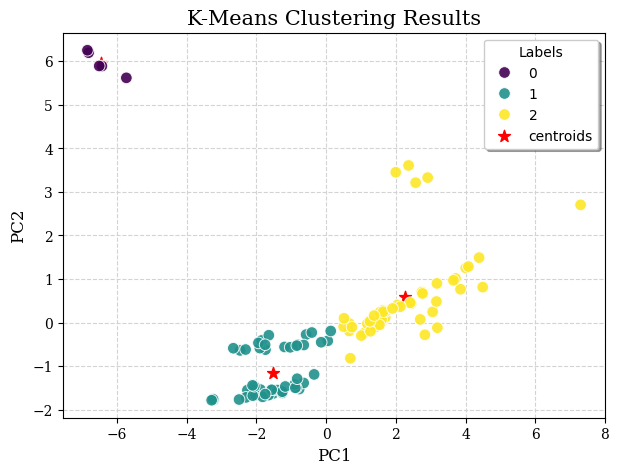

In [159]:
# adding a new feature of cluster labels to the dataset 3
dataset3['clusters'] = kmean.labels_

# visualizing clusters
pca = PCA(n_components=2)
MD_pca1 = pca.fit_transform(x)
df_pca = pd.DataFrame(MD_pca1, columns=['PC1','PC2'])
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC2', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

Thus the data is segmented to 3 clusters.

Now, let us try for 4 clusters to get more segments.

###K-Means Clustering for Number of Clusters=4

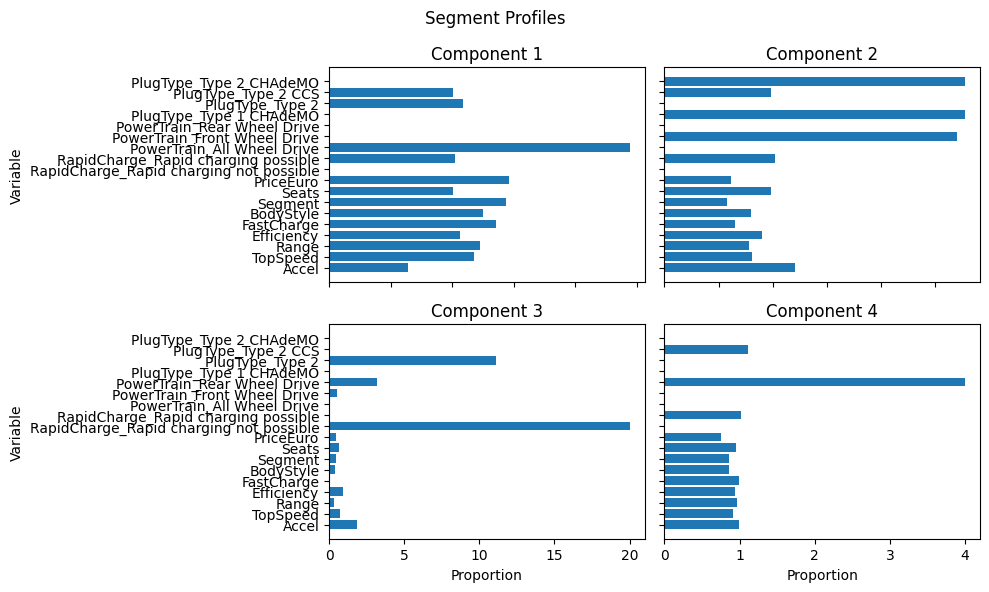

In [160]:
kmeans = MD_kmeans28['4']
labels = kmeans.labels_
X_2=X_1.copy()


col_sums = X_2.sum(axis=0)

# Divide each element by the col sum and multiply by 100
X_2prop = X_2.div(col_sums, axis=1) * 100

MD_mean = X_2prop.groupby(labels).mean()
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(X_1.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()
# print(MD_mean)
# labels

In [161]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(MD_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [162]:
pd.Series(kmean.labels_).value_counts()

1    42
0    35
3    21
2     5
Name: count, dtype: int64

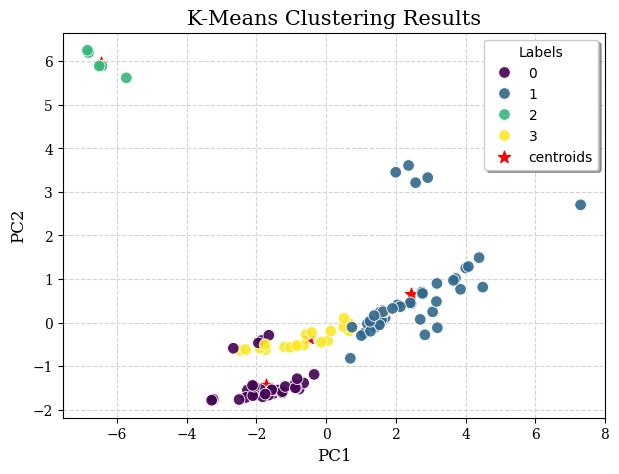

In [163]:
# adding a new feature of cluster labels to the dataset 3
dataset3['clusters'] = kmean.labels_

# visualizing clusters
pca = PCA(n_components=2)
MD_pca1 = pca.fit_transform(x)
df_pca = pd.DataFrame(MD_pca1, columns=['PC1','PC2'])
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC2', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()